# Inaugural Project

Importing and setting magics:

In [25]:
# Importing packages 
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

# Autoreload modules when code is run 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Setting plot style 
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The Edgeworth economy is an exchange economy with two consumers. Typically, there are two goods to consume, $x_1$ and $x_2$, and each consumer has an initial endowment which we will label $(\omega_{1A}, \omega_{2A})$ and $(\omega_{1B}, \omega_{2B})$. However, the consumers have preferences for each good, in they will exchange goods in accordance with these. In this problem set, we will model the following Cobb-Douglas preferences for consumer A and B:
$$
u_A(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha} \wedge u_B(x_1,x_2) = x_1^{\beta}x_2^{1-\beta} 
$$

A typical tool used in the context of an edgeworth economy is the edgeworth box. Itis a graphical tool to visualize the different allocations of goods. The dimensions of the box correspond to the total endowments of the two commodities, and each point inside the box represents a possible allocation

We will illustrate the following set in an Edgeworth box. 
$$
C = \left\{ (x_1^A, x_2^A) \, \Bigg| \, 
\begin{array}{c}
u^A(x_1^A, x_2^A) \geq u^A(\omega_1^A, \omega_2^A) \\[1em]
u^B(x_1^B, x_2^B) \geq u^B(\omega_1^B, \omega_2^B) \\[1em]
x_1^B = 1 - x_1^A, \, x_2^B = 1 - x_2^A \\[1em]
x_1^A, x_2^A \in \left\{0, \frac{1}{N}, \frac{2}{N}, \ldots, 1\right\}, \, N = 75
\end{array}
\right\}
$$

In [26]:
# Importing class from py-file
from inauguralproject import ExchangeEconomyClass

Deriving A and B's utility of their initial bundles and creating a set containing all combinations of goods which lead to Pareto improvements: 

In [27]:
# code for solving the model 
#import module
economy = ExchangeEconomyClass()

#set parameters as in the py-file
par = economy.par

The utility of the bundle (x1A = 0.8, x2A = 0.3) is: 0.416
The utility of the bundle (x1B = 0.2, x2B = 0.7) is: 0.304


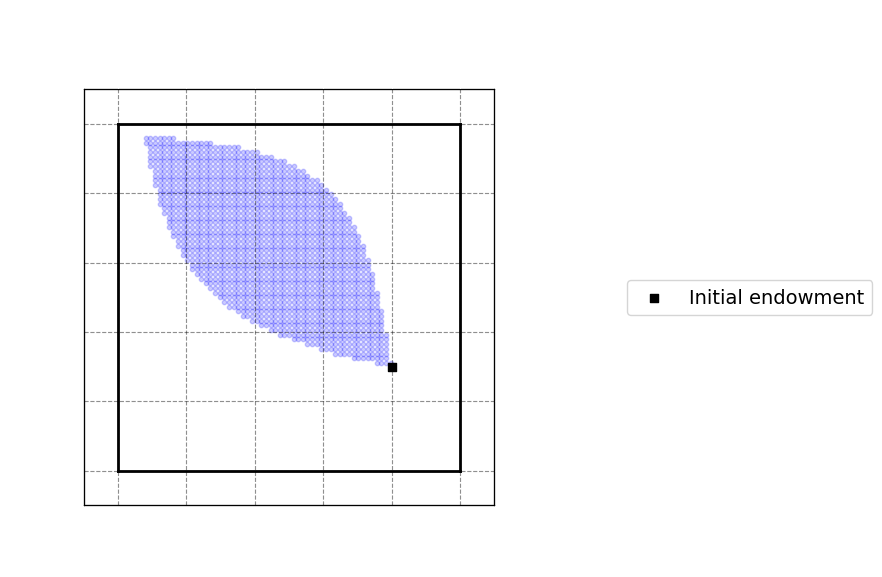

In [28]:
economy.plot_pareto()

Plotting the set of consumption bundles which lead to Pareto improvements in an Edgeworth box: 

# Question 2 and 3

To close in on an efficient allocation, we calculate the error in th market clearing condition s for $p_1 ∈ P_1 = {0.5,0.5+2\cdot \frac{1}{N} ,0.5+ 2\cdot\frac{2}{N} ,...,2.5}$, i.e.
$$ 
\epsilon_1(p,\omega) = x^{A⋆}_1 (p,\omega^A) −\omega^A_1 + x^{B⋆}_1 (p,\omega^B) −\omega^B_1
\epsilon_2(p,\omega) = x^{A⋆}_2 (p,\omega^A) −\omega^A_2 + x^{B⋆}_2 (p,\omega^B) −\omega^B_2
$$

In [29]:
# Define the price set with an increment of 2*1/N
# a. Define P1
N = 75
P1 = np.arange(0.5, 2.5+ (1/(N)*2), 1/(N)*2)

# Find the market errors
# a. loop over prices in price set using a for-loop
for p1 in P1[-5:]:
    # a. call the market clearing 
    epsilon_1, epsilon_2 = economy.check_market_clearing(p1)
    # b. print the last five results
    print((f'For p1 = {p1:.3f} the errors are: epsilon 1 = {epsilon_1:.3f}, epsilon 2 = {epsilon_2: .3f}'))    

For p1 = 2.393 the errors are: epsilon 1 = -0.363, epsilon 2 =  0.869
For p1 = 2.420 the errors are: epsilon 1 = -0.366, epsilon 2 =  0.885
For p1 = 2.447 the errors are: epsilon 1 = -0.368, epsilon 2 =  0.901
For p1 = 2.473 the errors are: epsilon 1 = -0.371, epsilon 2 =  0.917
For p1 = 2.500 the errors are: epsilon 1 = -0.373, epsilon 2 =  0.933


In [30]:
# Find market clearing prices
# a. set initial guess
init_guess = 2.5
# b. call the walras equilibrium function in the py-file
instance = economy.walras(init_guess, eps=1e-8, maxiter=500)

# c. demand functions
# i. consumer A
x1A, x2A = economy.demand_A(instance)

# ii. consumer B
x1B, x2B = economy.demand_B(instance)

# d. calculate utility
utility_A = economy.utility_A(x1A, x2A)
utility_B = economy.utility_B(x1B, x2B)

print(f'At the price p1 = {instance:.3f}, the market for both goods clear. The resulting utilty for A is {utility_A:.3f}')


  0: p1 =   2.12666667 -> excess demand ->    -0.37333333
  1: p1 =   1.79312435 -> excess demand ->    -0.33354232
  2: p1 =   1.50914630 -> excess demand ->    -0.28397804
  3: p1 =   1.28463453 -> excess demand ->    -0.22451178
  4: p1 =   1.12574572 -> excess demand ->    -0.15888881
   ...
 22: p1 =   0.94444445 -> excess demand ->    -0.00000001
At the price p1 = 0.944, the market for both goods clear. The resulting utilty for A is 0.569


To visualize this result, we construct a plot that shows to convergence to the Walras equilibrium

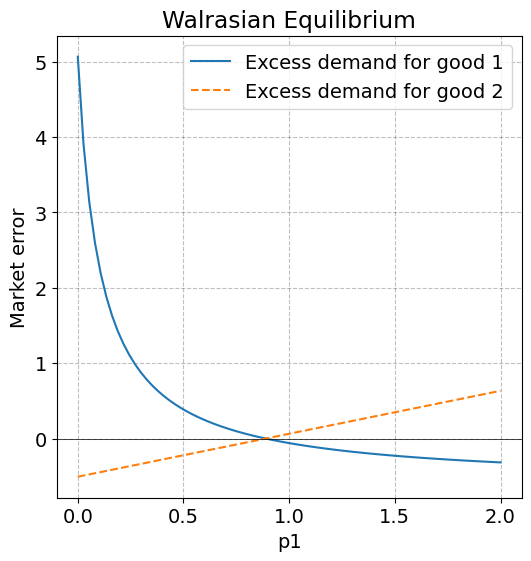

In [31]:
economy.plot_walras()

# Question 4a

In the following problems, we will assume that A chooses the price to maximize her own utility, and that B follows along. First, we assume that only prices within the already defined price set $P_1$ are allowed, i.e.
$$
\max_{p_1 \in P_1} u^A\left(1 −x^B_1 (p,\omega^B),1 −x^B_2 (p,\omega^B)\right)
$$

In [32]:
# Find the optimal price and allocation
# a. Define empty function to replace with the found solution.
optimal_price = ()
optimal_allocation = ()
max_utility = float("-inf")

# b. Loop over all prices in the price vector 
for p1 in P1:

# i. Call on demand function for B
    x1B, x2B = economy.demand_B(p1)

# ii. Make sure that the amount of each good left for A is positive 
    if 1-x1B > 0 and 1-x2B > 0:
        utility_A = economy.utility_A(1-x1B, 1-x2B)
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_price = p1
            optimal_allocation = (1-x1B, 1-x2B)

# c. Print the solution
print(f"The optimal price is {optimal_price:.3f}, and the optimal allocation for A is x1 = {optimal_allocation[0]:.3f} and x2 = {optimal_allocation[1]:.3f}.")
print(f"Resulting in utility {max_utility:.3f} for A.")

The optimal price is 1.887, and the optimal allocation for A is x1 = 0.619 and x2 = 0.641.
Resulting in utility 0.634 for A.


# Question 4b

We now allow for any positive price to be chosen, i.e.
$$
\max_{p_1 \in R^+} u^A\left(1 −x^B_1 (\mathbf{p},\mathbf{\omega^B}),1 −x^B_2 (\mathbf{p},\mathbf{\omega^B})\right)
$$
When the price can be all positive numbers, we find the optimal price by minimizing the negative utility of A.

In [33]:
# Find the optimal price and allocation using scipy

# a. Define the utility function for A
def uA(p1):
    x1B, x2B = economy.demand_B(p1)
    return economy.utility_A(1-x1B, 1-x2B)

# b. Define the constraint
new_price = [1]
obj_func = lambda p1: -uA(p1)
constraint = lambda p1: economy.utility_B(1-x1B, 1-x2B)
constraints = {'type': 'ineq', 'fun': constraint}

#c. call optimizer 
res = optimize.minimize(obj_func, new_price ,method='SLSQP', constraints=constraints)
p1_best_scipy=res.x[0]
ua_best_scipy=-res.fun
opt_best_scipy=(1-x1B, 1-x2B)

# d. print the solution
print(f"The optimal price is {p1_best_scipy:.3f}, and the optimal allocation for A is x1 = {opt_best_scipy[0]:.3f} and x2 = {opt_best_scipy[1]:.3f}.")
print(f"The resulting utility for A is given by {ua_best_scipy:.3f}.")

The optimal price is 1.897, and the optimal allocation for A is x1 = 0.680 and x2 = 0.600.
The resulting utility for A is given by 0.634.


# Questions 5a and 5b

In the following questions, we assume that consumer A is the market maker. This implies that A chooses B’s consumption in such a way that B is not worse of than in the initial endowment. For question 5a, we constrain the choice of possible allocations to the already defined set C.

In [45]:
economy.market_maker()

Looping through the set C, the utility is maximised for agent A when x1 = 0.581 and x2 = 0.838 with u = 0.742


(0.5810810810810811, 0.8378378378378379)

We now find the allocation if no further restrictions are imposed, i.e. any allocation can be chosen

In [35]:
#find allocation if choice set is unrestricted, but B must not be worse off than with initial endowment
consumer = ExchangeEconomyClass()
consumer.solve()
print(f'x1 = {consumer.sol.x1:.3f}, x2 = {consumer.sol.x2:.3f}, u = {consumer.utility_A(consumer.sol.x1,consumer.sol.x2):.3f}')


x1 = 0.576, x2 = 0.844, u = 0.743


# Question 6a and 6b

Instead of either consumer choosing the allocation, we now assume that both A’s and B’s consumption are chosen by a utilitarian social planner to maximize the aggregate utility, i.e.
$$
\max_{(x^A_1 ,x^A_2) \; \in \; [0,1] \times [0,1]} u^A(x^A_1 ,x^A_2) + u^B(1 −x^A_1 ,1 −x^A_2)
$$

In [36]:
# Find the optimal allocation using scipy
# a. call solver
opt = ExchangeEconomyClass()
opt.solve_socialplanner()
print(f'The optimal value of x1 = {opt.sol.x1:.3f}, and x2 = {opt.sol.x2:.3f}, at which the utility is u = {opt.sol.u:.3f}')

The optimal value of x1 = 0.333, and x2 = 0.667, at which the utility is u = 0.529


Looping through the set C, the utility is maximised for agent A when x1 = 0.581 and x2 = 0.838 with u = 0.742
Looping through the set C, the utility is maximised for agent A when x1 = 0.581 and x2 = 0.838 with u = 0.742


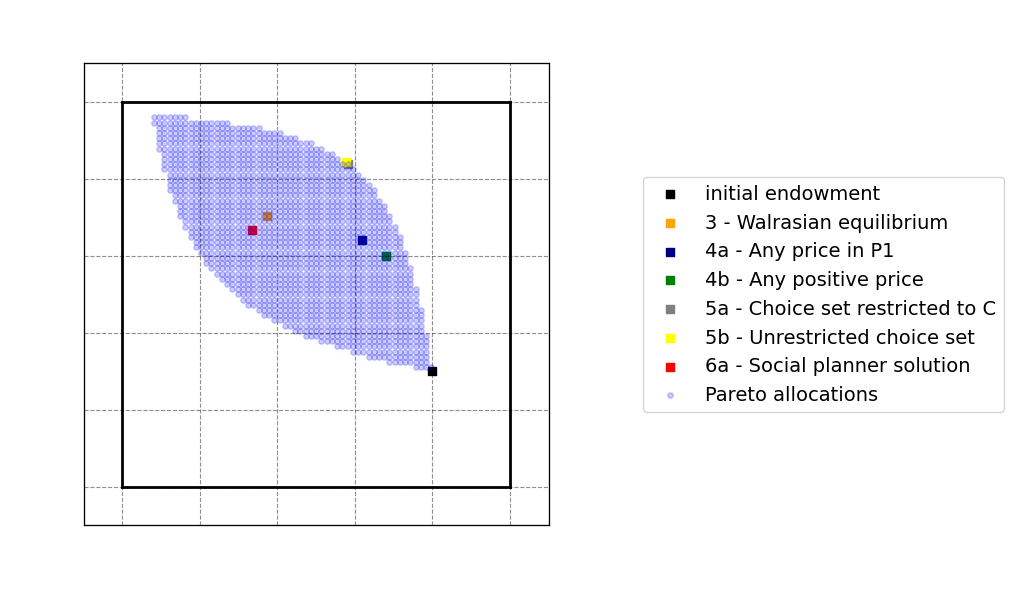

In [46]:
# Show different allocations in the Edgeworth box
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$",color="white")
ax_A.set_ylabel("$x_2^A$", color="white")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$", color="white")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$", color="white")

ax_A.tick_params(axis='x', colors='white')
ax_A.tick_params(axis='y', colors='white')
ax_B.tick_params(axis='x', colors='white')
temp.tick_params(axis='y', colors='white')

# A
# a. initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='initial endowment')

# b. 3
ax_A.scatter(x1A,x2A,marker='s',color='orange',label='3 - Walrasian equilibrium')

# c. 4a
ax_A.scatter(optimal_allocation[0], optimal_allocation[1], marker='s',color='navy',label='4a - Any price in P1')

# d. 4b 
ax_A.scatter(opt_best_scipy[0], opt_best_scipy[1] ,marker='s',color='green',label='4b - Any positive price')

# e. 5a 
ax_A.scatter(economy.market_maker()[0], economy.market_maker()[1] ,marker='s',color='gray',label='5a - Choice set restricted to C')

# f. 5b
ax_A.scatter(economy.solve()[0],economy.solve()[1],marker='s',color='yellow',label='5b - Unrestricted choice set')

# g. 6a
ax_A.scatter(opt.sol.x1,opt.sol.x2 ,marker='s',color='red',label='6a - Social planner solution')

# Possible allocations
ax_A.scatter(economy.set_C()[:, 0], economy.set_C()[:, 1], s=15, color='blue', alpha=0.2, label='Pareto allocations')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='center right',bbox_to_anchor=(2.0,0.5));

As can be observed from plotted allocations arising from question 3-6a in the figure above, it plays an important part how we constrain the consumers in regard to prices, choice set, etc. Unsurprisingly, we find that scenario 5a and 5b result in similar allocations, since the optimal allocation found in 5b was almost comprised in the set $C$. 

We oberve the most dramtical change when consumer A becomes the market maker. In this scenario, consumer A's level of consumption for both goods increase, and hence, ends up with the highest utility of the two agents. 
All the above allocations are pareto improvements to the initial endowment, but as it is already noted, the relative endowments differ a lot from scenario to scenario. The most fair allocation seems to be the one conducted by a social planner, since this solution also takes consumer B's preferences into account.

# Question 7

We create a set of endowments by randomly drawing 50 endowment pairs from a uniform distribution.

In [ ]:
# draw pairs from py-file
pairs = economy.draw_pairs()
print(f'The last two pairs in the set are given by {(pairs[-2:])}')


The last two pairs in the set are given by [(0.592377726270904, 0.34853522654285374), (0.4886257918526844, 0.5675279542868369)]


# Question 8

For each pair of endowments created, we find the equilibrium by minimizing the market error. We then plot each solution in the Edgeworth box.

In [ ]:
# Change values of endowments back to inital values
economy.par.w1A = 0.8
economy.par.w2A = 0.3

  0: p1 =   0.95498465 -> excess demand ->    -0.04501535
  1: p1 =   0.93252403 -> excess demand ->    -0.02246063
  2: p1 =   0.92213149 -> excess demand ->    -0.01039253
  3: p1 =   0.91752181 -> excess demand ->    -0.00460968
  4: p1 =   0.91551909 -> excess demand ->    -0.00200272
   ...
 19: p1 =   0.91401176 -> excess demand ->    -0.00000001
  0: p1 =   1.05836014 -> excess demand ->     0.05836014
  1: p1 =   1.08614361 -> excess demand ->     0.02778347
  2: p1 =   1.10052497 -> excess demand ->     0.01438136
  3: p1 =   1.10823488 -> excess demand ->     0.00770991
  4: p1 =   1.11243949 -> excess demand ->     0.00420461
   ...
 25: p1 =   1.11762662 -> excess demand ->     0.00000002
 27: p1 =   1.11762663 -> excess demand ->     0.00000001
  0: p1 =   1.03069865 -> excess demand ->     0.03069865
  1: p1 =   1.04682320 -> excess demand ->     0.01612455
  2: p1 =   1.05563507 -> excess demand ->     0.00881187
  3: p1 =   1.06054505 -> excess demand ->     0.00490998


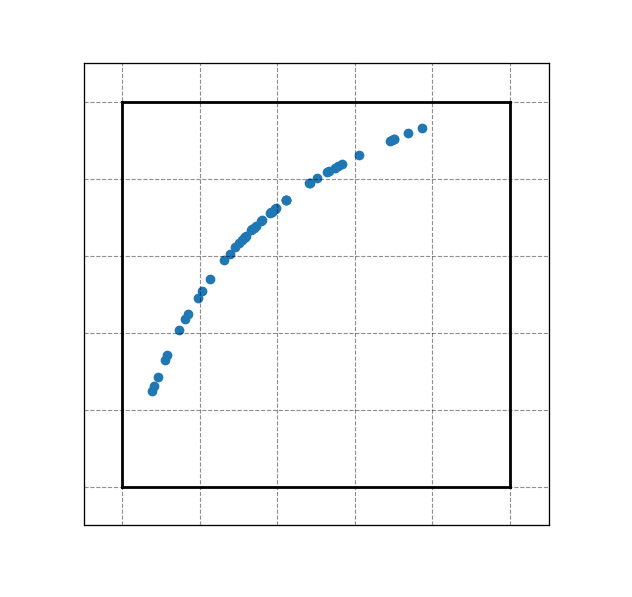

In [ ]:
economy.plot_walras_all()